# COMP4030 - Data Science and Machine Learning - Lab 4
# Data Analysis and Modelling

*Authors*: Nazia Hameed, Jeremie Clos

**Points from previous labs you absolutely need to be familiar with**:

- read Excel file: `pd.read_excel()`
- read CSV file: `pd.read_csv()`
- rename columns: `df.rename()`
- unique values from a column: `df.unique()`
- duplicated rows: `df.duplicated()`
- drop duplicated rows: `df.drop_duplicates()`
- quantile / percentile: `df.quantile()`
- rows with *NaN*: `df.isna()`
- drop rows with *NaN*: `df.dropna()`

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. Getting started with Data Analysis-Importing the Dataset

Let's first get started with data pre-processing on automobile price prediction dataset. You can download the dataset from the Moodle.Alternatively, dataset can be downloaded from the UCI dataset repository using the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/. If you are downloading the dataset from the provided link you need to convert this data in the .csv format and you may need to add headers to the data aswell as they are not combined. To do so, you need to create a headers list. 

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
         
Then use `dataframe.columns = headers` to replace the headers with the list you have created.

Lets get started by reading the dataset available on the moodle. 

In [ ]:
# Read the csv file 
df = pd.read_csv('rawautodata.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As the headers are available in a seperate file,they need to be added manually.<br>
**Task** add headers to the dataframe and show first five records.

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 2. Data Pre-processing/Data Cleaning/Data Wrangling
Data wrangling is the process of cleaning, structuring and enriching raw data into a format that may be better for analysis.We can pre-process data to make it more meaningful. If you recall from Lab 2, to replace ? with NaN,`.replace(A, B, inplace = True)` function is used. <br>
Using the `inplace=True` keyword in a pandas ‘modifies the underlying data’. It mutates the actual object which you apply it to. <br>
**Task** Replace all ? with NaN and display first 10 reords


In [ ]:
import numpy as np
df1=df.replace('?',np.NaN,inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


After replacing ? with NaN, you need to evaluate the missing data. There are two methods to detect missing data:<br>

**.isnull()**<br>
**.notnull()**<br>

The output of these methods is a boolean value indicating whether the value that is passed into the argument is missing or not. 


In [ ]:
missingdata = df.notnull()
missingdata.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In the above output, True means that the data is not a missing value and false means that data is missing. Recalling from Lab 2, there are different ways to deal with missing data and these are as follows: 
<br><br>
**Drop data**<br>
Drop the whole row<br>
Drop the whole column<br>
**Replace data**<br>
Replace it by mean<br>
Replace it by frequency<br>
Replace it based on other functions<br>

If you want you can count the number of missing values for each column and than decide what you want to do with the missing values. You can use `value_counts()` to count the number of missing values.e.g the number of missing values in normalized-losses can be found as follows

In [ ]:
 print (missingdata['normalized-losses'].value_counts())

True     164
False     41
Name: normalized-losses, dtype: int64


In the above example, you can see that 41 values are missing from the normalized-losses. Similarly you can find the missing values for each column. <br>
**Task** Find the missing values for each column. <br>

In [ ]:
for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("") 

symboling
True    205
Name: symboling, dtype: int64

normalized-losses
True     164
False     41
Name: normalized-losses, dtype: int64

make
True    205
Name: make, dtype: int64

fuel-type
True    205
Name: fuel-type, dtype: int64

aspiration
True    205
Name: aspiration, dtype: int64

num-of-doors
True     203
False      2
Name: num-of-doors, dtype: int64

body-style
True    205
Name: body-style, dtype: int64

drive-wheels
True    205
Name: drive-wheels, dtype: int64

engine-location
True    205
Name: engine-location, dtype: int64

wheel-base
True    205
Name: wheel-base, dtype: int64

length
True    205
Name: length, dtype: int64

width
True    205
Name: width, dtype: int64

height
True    205
Name: height, dtype: int64

curb-weight
True    205
Name: curb-weight, dtype: int64

engine-type
True    205
Name: engine-type, dtype: int64

num-of-cylinders
True    205
Name: num-of-cylinders, dtype: int64

engine-size
True    205
Name: engine-size, dtype: int64

fuel-system
True    205
Name:

We will replace the missing values of normalized-losses with average value i.e. mean. 


In [ ]:
mean_normloss = df["normalized-losses"].astype("float").mean(axis=0) #axis = 0 means along the column 
df["normalized-losses"].replace(np.nan, mean_normloss, inplace=True)
missingdata = df.notnull()
print (missingdata['normalized-losses'].value_counts())

True    205
Name: normalized-losses, dtype: int64


After replacing NaN values for normalized-losses we again print the missing values.You can note that there are no missing values now. <br>
**Task** In our data set, for following columns replace the missing values with the average value( i.e. mean). 
"stroke", "bore", "horsepower", "peak-rpm"



In [ ]:
mean_stroke = df["stroke"].astype("float").mean(axis=0)
df["stroke"].replace(np.nan, mean_stroke, inplace=True)
mean_bore = df["bore"].astype("float").mean(axis=0)
df["bore"].replace(np.nan, mean_bore, inplace=True)
mean_horsepower = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, mean_horsepower, inplace=True)
mean_peakrpm = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, mean_peakrpm, inplace=True)

If you observe the dataset, you will find that the num-of-doors is non-numeric hence you cannot take mean. Lets calculate the frequencies of items. You can use counter function `.value_counts()`. Other alternatives to calculate frequency are `value_counts()` and `idxmax()`.

In [ ]:
from collections import Counter
Counter(df["num-of-doors"])

Counter({'two': 89, 'four': 114, nan: 2})

From the data you can see that four doors is most frequent occuring value,so we will replace the missing values in `num-of-doors` with four. <br>
**Task** Replace the NaN value with four for "num-of-doors"

In [ ]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

As our final goal is to pridict the price so the rows where price is missing are not use ful in training and testing the model so we will drop the rows whrice price value is missing. <br>
**Task** Recall dropna from lab 2 and drop the rows with missing price value.

In [ ]:
df.dropna(subset=["price"], axis=0, inplace=True) #axis=0 is used to drop the entire row

You may wish to reset the id's as some rows are droped from the dataset. To reset the index you can use `reset_index`

In [ ]:
df.reset_index(drop=True, inplace=True)

**Task** Display the bottom 10 rows of the dataframe

In [ ]:
df.tail(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
191,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
192,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
193,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
194,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
195,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


If you want you can check if you still have any missing values.

In [ ]:
missingdata = df.notnull()
for column in missingdata.columns.values.tolist():
    print(column)
    print (missingdata[column].value_counts())
    print("")  

symboling
True    205
Name: symboling, dtype: int64

normalized-losses
True    205
Name: normalized-losses, dtype: int64

make
True    205
Name: make, dtype: int64

fuel-type
True    205
Name: fuel-type, dtype: int64

aspiration
True    205
Name: aspiration, dtype: int64

num-of-doors
True     203
False      2
Name: num-of-doors, dtype: int64

body-style
True    205
Name: body-style, dtype: int64

drive-wheels
True    205
Name: drive-wheels, dtype: int64

engine-location
True    205
Name: engine-location, dtype: int64

wheel-base
True    205
Name: wheel-base, dtype: int64

length
True    205
Name: length, dtype: int64

width
True    205
Name: width, dtype: int64

height
True    205
Name: height, dtype: int64

curb-weight
True    205
Name: curb-weight, dtype: int64

engine-type
True    205
Name: engine-type, dtype: int64

num-of-cylinders
True    205
Name: num-of-cylinders, dtype: int64

engine-size
True    205
Name: engine-size, dtype: int64

fuel-system
True    205
Name: fuel-system, 

**Yahoo!!!!!!** there are no more missing values in the dataset. After removing all the missing values you may want to save this dataset. If you want to save the dataset you can use `df.to_csv()`. You may also save the dataset after applying data normalisation.

## Data Normalisation
Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. We learned different data normalisation techniques in Lab 2 such as Min-max normalisation,Standard score, Simple feature scaling etc.  
**Task** Normalise the length, width and height  using the min-max normalisation and display length, width and height of first five records.<br>
**Hint: Min-Max Normalisation Formula**<br>
$$
\frac{X - X_{min}}{X_{max}-X_{min}}
$$


In [ ]:
df['length'] = ((df['length']-df['length'].min()) /(df['length'].max()-df['length'].min()))
df['width'] = ((df['width']-df['width'].min()) /(df['width'].max()-df['width'].min()))
df['height'] = ((df['height']-df['height'].min()) /(df['height'].max()-df['height'].min()))
df[["length","width","height"]].head()

,length,width,height
0,0.413433,0.324786,0.083333
1,0.413433,0.324786,0.083333
2,0.449254,0.444444,0.383333
3,0.529851,0.504274,0.541667
4,0.529851,0.521368,0.541667


Now we can see that length, widht and height are now normalised and are in 0-1 range. 

Lets observe our data further and visualise the horse power. 


In [ ]:
df['horsepower'].describe()

count     201
unique     59
top        68
freq       19
Name: horsepower, dtype: object

In [ ]:
df['horsepower'].nunique()

59

We can see that "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. Lets now try to visualise this data.

Text(0.5, 1.0, 'Total Horsepower Bins')

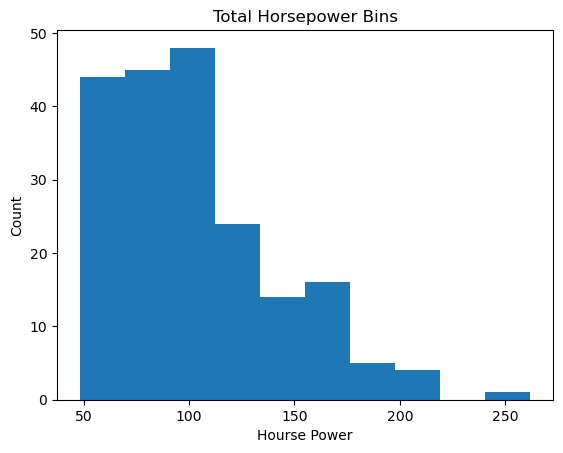

In [ ]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("Hourse Power")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Total Horsepower Bins")


## Binning 
Binning is a way to group a number of more or less continuous values into a smaller number of "bins".We can convert this data into discrete number of bins e.g 3 bins to make the data distribution more understandable. Sometime binning also helps in increasing the model accuracy. To create bins you can use `linspace` function.<br>
We can apply the function "cut" to determine the bin for each hoursepower value.Pandas cut() function is used to separate the array elements into different bins [1].

Text(0.5, 1.0, 'Total Horsepower Bins')

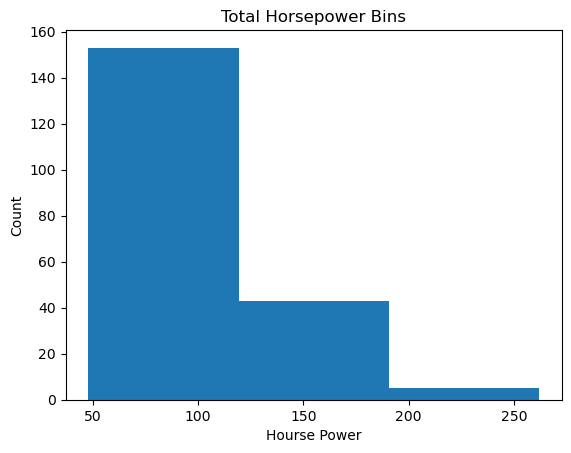

In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"], bins = 3)


plt.pyplot.xlabel("Hourse Power")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Total Horsepower Bins")

Regression analysis requires numerical variables. So, if you want to include any categorical variable in a regression model, supplementary steps are required to make the results interpretable.In these steps, the categorical variables are recoded into a set of separate binary variables. This recoding is called “dummy coding”. In python, We can use `get_dummies` to assign numerical values to different categorical data. Lets perform the dummy coding on fuel-type.

In [ ]:
dummy_fueltype = pd.get_dummies(df["fuel-type"])

If you want to give a meaning ful name to the dummy fuel type you can do it using the following code. We are skipping it for now. <br>
`dummy_fueltype.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)` <br>
after calculating the dummy values, you need to concatinate the dummy variable with the existing data and drop the existing fuel-type parameter as well. 

In [ ]:
df = pd.concat([df, dummy_fueltype], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)

**Task** Create a dummy variable for "aspiration". Drop the existing column and append the new one with the existing list.


In [ ]:
dummy_aspiration = pd.get_dummies(df['aspiration'])
df = pd.concat([df, dummy_aspiration], axis=1)
df.drop('aspiration', axis = 1, inplace=True)

After data-pre-processing we will move towards the Exploratory Data Analysis <br>
## 3. Exploratory Data Analysis (EDA) 
EDA is used by data scientists to analyse and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

You should define meaning research question before exploring the data. In the lab our main target is to find the most meaningful features for pridicting the car price

The first thing to start is with exploring the datatypes of the data.There can be different type of data in any dataset. The type of data in the pandas dataframe could be float64, int64, datetime64 and object. You can check the datatype of data using `df.dtypes`. 

In [ ]:
df.dtypes

symboling               int64
normalized-losses      object
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ratio     float64
horsepower              int32
peak-rpm               object
city-mpg                int64
highway-mpg             int64
price                  object
horsepower-binned    category
diesel                  uint8
gas                     uint8
std                     uint8
turbo                   uint8
dtype: object

If you check the values in the csv sheet you will observe that some of the datatype doesnot match with the data stored in the file. We need to change the datatype of these columns. To change the datatype you can use `.astype()` funtion. Contining to the observation of datatype, <br>
'bore' and 'stroke' variables are numerical values therefore the datatype should be either int or float,where as you can see in the above output that their datatype is object. Therefore, we will change their datatype. 

In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

**Task**: Explore the data and find the columns with mismatched datatype and convert them to their appropriate datatype. 

In [ ]:
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Now check th datatypes again to verify that the datatype of each column is correct. 

In [ ]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
horsepower-binned    category
diesel                  uint8
gas                     uint8
std                     uint8
turbo                   uint8
dtype: object

There are some other methods as well to get some information about the dataset such as `df.info()`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int32   
 2   make               201 non-null    object  
 3   num-of-doors       201 non-null    object  
 4   body-style         201 non-null    object  
 5   drive-wheels       201 non-null    object  
 6   engine-location    201 non-null    object  
 7   wheel-base         201 non-null    float64 
 8   length             201 non-null    float64 
 9   width              201 non-null    float64 
 10  height             201 non-null    float64 
 11  curb-weight        201 non-null    int64   
 12  engine-type        201 non-null    object  
 13  num-of-cylinders   201 non-null    object  
 14  engine-size        201 non-null    int64   
 15  fuel-system        201 non-null    object  
 16  bore    

## Correlation 
Corelation analysis measures the statistical relationship between two different variables. The result will show how the change in one parameter would impact the other parameter. <br>  It can be described as positive,negative or no correlation. <br>![corelation.png](attachment:corelation.png)
There is a positive correlation when the variable on the x-axis increases as the variable on the y-axis increases.<br>
There is a negative correlation when one variable increases as the other variable decreases.<br>
**Pearson Correlation**
The Pearson Correlation measures the linear dependence between two variables X and Y.<br> Pearson correlation gives you two values <br>
1. Correlation coefficient 
2. p value
**1. Correlation coefficient** <br>
The resulting Correlation coefficient is a value between -1 and 1 inclusive, where:<br><br>
1: Perfect positive linear correlation.<br>
0: No linear correlation, the two variables most likely do not affect each other.<br>
-1: Perfect negative linear correlation.<br>
We can calculate the Correlation of the'int64' or 'float64' variables.In Python, corelation could be find by using `corr()`. 

In [ ]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.241064,-0.241064,-0.218233,0.218233


If you want to find correlation between a set of columns, you can use the following sytax `df[['column1','column1','column1']].corr()`
**Task** Find the correlation between the following columns inthe dataset <br> bore, stroke, compression-ratio, and horsepower.

In [ ]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


## Regplot <br>
As we are finding the suitable variables to predict the car price. In our dataset, price is the target variable. To understand (linear) relationship between an individual variable and the price, you can use "regplot".The regplot function generates a scatter plot with a regression line. lets plot the regplot of "engine-size" and "price". 

(0.0, 53110.41844836429)

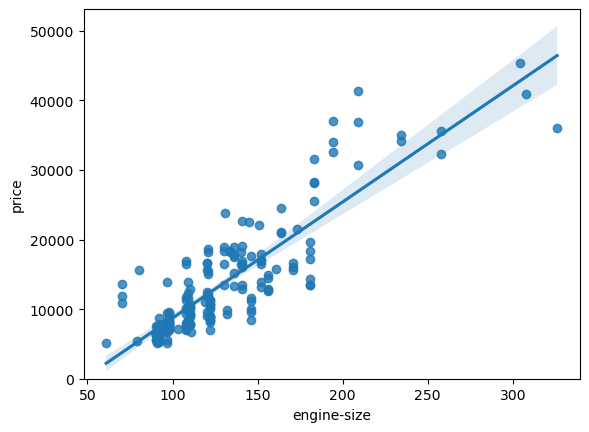

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

From the regplot we can see that there is positive correlation between engine-size and pice i.e. if the value of engine-size goes up, the value of price will also go up. Lets calculate the correlation value among these two.

In [ ]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


From the output we can see that correlation value is 0.87. which means that engine-size is a meaningful variable to predict the price. 

**Task** Display the regplot for highway-mpg and price.Also find the correlation value.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

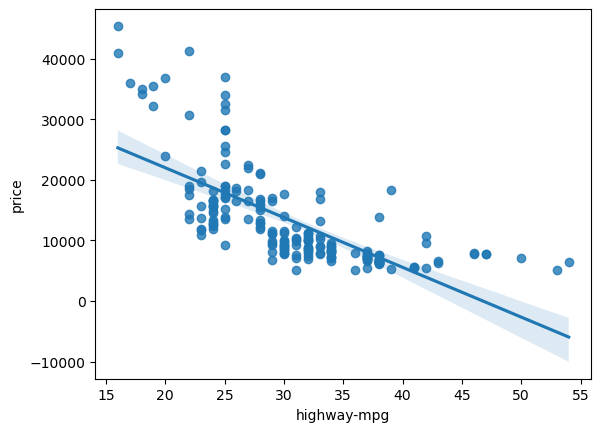

In [ ]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [ ]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


From the regplot of "highway-mpg" and "Price", we can see that there is negative correlation between these two i.e. when the value of highway-mpg increases, the price of the car decreases. The correlation value of -.70 indicates that this is another meaningful parameter for pridicting car price. Lets look at the example of weak correlation.

<AxesSubplot:xlabel='stroke', ylabel='price'>

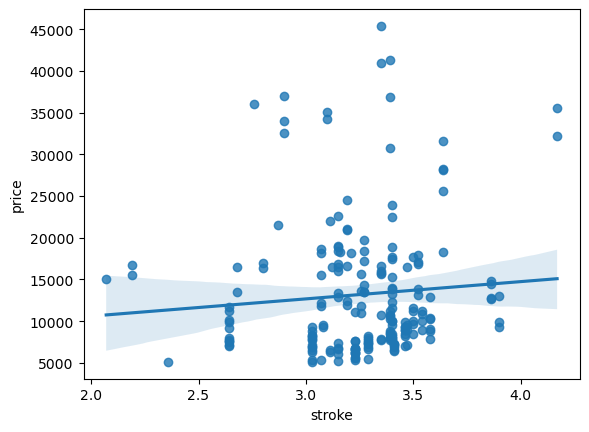

In [ ]:
sns.regplot(x="stroke", y="price", data=df)

In [ ]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


From the reg plot and the correlation price, we can see that there is a weak correlation between the stroke and price. 

In [ ]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


**Task** Find the correlation of each numeric variable with price.

In [ ]:
NumericalParameters = ["symboling","normalized-losses","wheel-base", "length","width","height","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","diesel","gas","std","turbo"]
for column in NumericalParameters:
    print (df[[column, 'price']].corr())  

           symboling     price
symboling   1.000000 -0.082391
price      -0.082391  1.000000
                   normalized-losses     price
normalized-losses           1.000000  0.133999
price                       0.133999  1.000000
            wheel-base     price
wheel-base    1.000000  0.584642
price         0.584642  1.000000
          length     price
length  1.000000  0.690628
price   0.690628  1.000000
          width     price
width  1.000000  0.751265
price  0.751265  1.000000
          height     price
height  1.000000  0.135486
price   0.135486  1.000000
             curb-weight     price
curb-weight     1.000000  0.834415
price           0.834415  1.000000
             engine-size     price
engine-size     1.000000  0.872335
price           0.872335  1.000000
           bore     price
bore   1.000000  0.543155
price  0.543155  1.000000
          stroke     price
stroke  1.000000  0.082269
price   0.082269  1.000000
                   compression-ratio     price
compression

Sometimes we would like to know the significant of the correlation estimate.<br>
**P-value**
The P-value is the probability value that the correlation between these two variables is statistically significant. If this probability is lower than the conventional 5% (P<0.05) the correlation coefficient is called statistically significant. It is, however, important not to confuse correlation with causation. When two variables are correlated, there may or may not be a causative connection, and this connection may moreover be indirect. Correlation can only be interpreted in terms of causation if the variables under investigation provide a logical (biological) basis for such interpretation[3].

95% confidence interval (CI) for the Pearson correlation coefficient: this is the range of values that contains with a 95% confidence the 'true' correlation coefficient.
By convention, when the <br>
p-value is  < 0.001: we say there is strong evidence that the correlation is significant.<br>
p-value is  < 0.05: there is moderate evidence that the correlation is significant.<br>
p-value is < 0.1: there is weak evidence that the correlation is significant.<br>
p-value is  > 0.1: there is no evidence that the correlation is significant.<br>

In python you can calculate the peason correlation using `scipy.stats`module. lets calulate the pearson correlation between engine-size and price.

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


**Task** Calculate the Pearson Correlation Coefficient and P-value of each numeric variable with price. Find a list of meaningful numeric parameters for predicting car price.

In [ ]:
NumericalParameters = ["symboling","normalized-losses","wheel-base", "length","width","height","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","diesel","gas","std","turbo"]
for column in NumericalParameters:
    pearsoncoef, pvalue = stats.pearsonr(df[column], df['price'])
    print(column,": The Pearson Correlation Coefficient is", pearsoncoef, " with a P-value of P =", pvalue)  

symboling : The Pearson Correlation Coefficient is -0.08239118716962358  with a P-value of P = 0.2449148765716521
normalized-losses : The Pearson Correlation Coefficient is 0.13399873429274334  with a P-value of P = 0.05789749352703121
wheel-base : The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20
length : The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P = 8.016477466158986e-30
width : The Pearson Correlation Coefficient is 0.7512653440522672  with a P-value of P = 9.20033551048217e-38
height : The Pearson Correlation Coefficient is 0.1354863075680597  with a P-value of P = 0.055146273251013435
curb-weight : The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P = 2.1895772388936914e-53
engine-size : The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64
bore : The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value 

## Categorical Data
To visualise the categorical data, you can use boxplots.Lets look at the relation ship between the 'body-style' and 'price'. As you learned from lab 3 that boxplot can be plotted using seaborn library as follows: 

<AxesSubplot:xlabel='body-style', ylabel='price'>

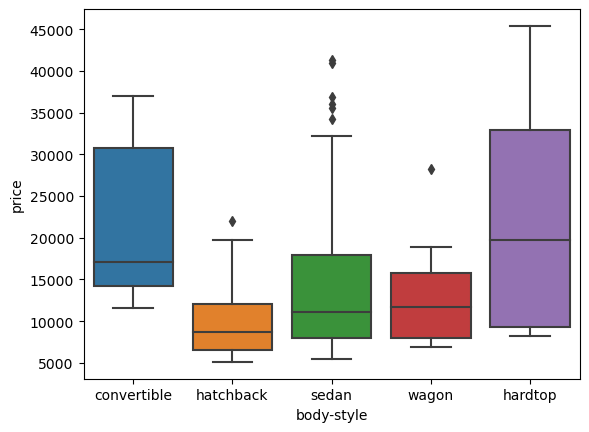

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)

We see clearly visualise from the boxplot that different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Lets explore other categorical parameters. <br>
**Task** Visualise the relationship between engine-location,drive-wheels using box plot and determine either they are good parameters for predicting car price or not. 

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

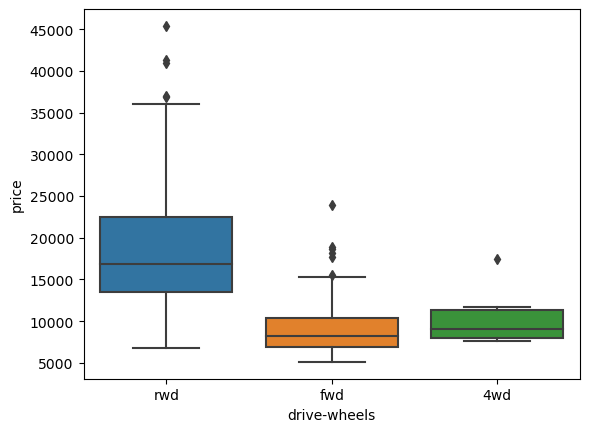

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=df)

We can see from the box plot that the distribution of price between the different drive-wheels categories differs. This indicates that the drive-wheels could potentially be a predictor of price.

<AxesSubplot:xlabel='engine-location', ylabel='price'>

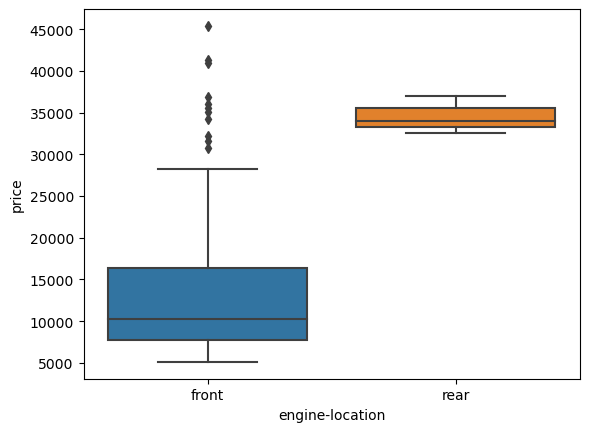

In [ ]:
sns.boxplot(x="engine-location", y="price", data=df)

<AxesSubplot:xlabel='make', ylabel='price'>

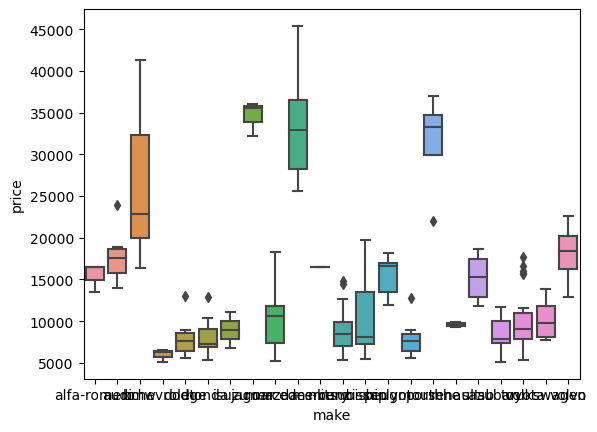

In [ ]:
sns.boxplot(x="make", y="price", data=df)

<AxesSubplot:xlabel='num-of-doors', ylabel='price'>

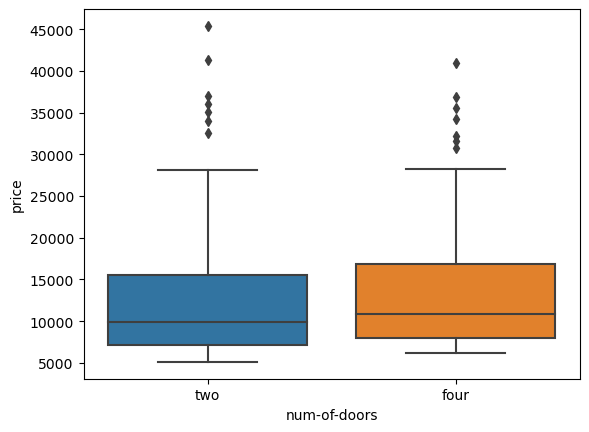

In [ ]:
sns.boxplot(x="num-of-doors", y="price", data=df)

We can see from the box plot that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

## Descriptive Statistical Analysis
![Interquartile Range](https://miro.medium.com/v2/resize:fit:640/format:webp/1*zL6qxjoZH2tVLakIVGAFWg.png) 

To get statistical summary of the every column you can use `df.describe()`. The describe() method returns description of the data(exluding NaN) in the DataFrame.DEscribe method will provide the following information for ecah column.<br> 
count - The number of not-empty values.<br>
mean - The average (mean) value.<br>
std - The standard deviation.<br>
min - the minimum value.<br>
25% - The 25% percentile<br>
50% - The 50% percentile<br>
75% - The 75% percentile<br>
max - the maximum value<br>


In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.494045,0.477697,0.497222,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.183913,0.179613,0.203985,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.000000,0.000000,0.000000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.383582,0.324786,0.350000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.479104,0.444444,0.525000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.632836,0.538462,0.641667,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


By default describe shows the statistical summary of all numeric-typed (int, float) columns.If you want to check the statistical summary of object type, you need to add an argument "Include="all"". When you will you all you will get additional information i.e.count,unique,top,freq. While using df.describe(include = "all") some values in the table will be shown as "NaN". This is because those numbers are not available regarding a particular column type. For basic statistics for object variables you can use `df.describe(include=['object'])`

In [ ]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


Task: After finishing the EDA process,list down the meaningful parameters for predicting the price of the car. 

**Continuous numerical variables:**

Length<br>
Width<br>
Curb-weight<br>
Engine-size<br>
Horsepower<br>
City-mpg<br>
Highway-mpg<br>
Wheel-base<br>
Bore<br>

**Categorical variables:**<br>
Drive-wheels<br>
engine-location


# References <br>
[1]Pandas.cut() method in Python, available at "https://www.geeksforgeeks.org/pandas-cut-method-in-python/", retrived on 27th Feburary 2023 <br>
[2] EDA – correlation analysis, available at "https://tinyurl.com/bddbtm8k", retrived on 27th Feburary 2023 <br>
[3].Pearson correlation, available at "https://tinyurl.com/yckmx5wa", retrived on 27th Feburary 2023 <br>

### Save the processed data 

In [ ]:
df.to_csv('processedautodata.csv')